# `k`-mean Clustering

**Welcome from Week 11** of Data Science *Using Python*!

ဒီတပါတ်မှာ ကျနော်တို့ **clustering** အကြောင်းကို ဆွေးနွေးကြမယ်။ 

## A Review

**Machine Learning (ML)** ဟာ Data Science ရဲ့ အရေးပါတဲ့ အစိတ်အပိုင်းတခုဖြစ်တယ်။ 

Machine Learning မှာ အောက်ပါအတိုင်း ၄ ပိုင်းပါဝင်တယ်လို့ ယေဘုယျအားဖြင့် ယူဆကြတယ်

1. **Regression** - Real number တွေကို ခန့်မှန်း/တွက်ချက် predict နိုင်တဲ့ Model များကို တည်ဆောက်ခြင်း
    * ဥပမာ ... အိမ်တလုံးရဲ့ တန်ဖိုး၊ မုန်တိုင်းရဲ့ ပြင်းထန်မှုအား စသည်
  
2. **Classification** - Category (class) တွေကို ခန့်မှန်း/တွက်ချက် predict နိုင်တဲ့ Model များကို တည်ဆောက်ခြင်း
    * ဥပမာ ... ပုံတပုံသည် ကြောင်/ခွေးဖြစ်သည်၊ Transaction တခုသည် Fraud ဖြစ်သည်/မဖြစ်သည်၊ မေးခွန်း၏ အဖြေသည် Y/N ဖြစ်သည် စသည်

3. **Clustering** - Sample (point/vector) တွေကို တူရာ စုပေးခြင်း (ဒီနေ့ လေ့လာမဲ့ အပိုင်း) နဲ့

4. **Dimensionality Reduction** - Data များ၏ dimension (column အရေအတွက်) ကို လျှော့ချခြင်း (part 2 မှာ လေ့လာမဲ့ အပိုင်း) တို့ ဖြစ်ကြတယ်။

## Clustering Techniques

Clustering မှာ label မရှိဘူး၊ Data တွေကို အစုဘယ်နှစု စုပုံပေးရမယ်ဆိုတဲ့ အစုအရေအတွက် (number of cluster) ကို ကြိုသိ/မသိပေါ်မှာ မူတည်ပြီး Clustering Techniques တွေကို 2 မျိုး ခွဲနိုင်တယ်။ 

1. Clustering techniques where number of cluster is known in advance and
2. Clustering techniques where number of cluster is NOT known in advance

ထုံးစံအတိုင်း အသင့်ရေးထားတဲ့ code တွေနဲ့ စလိုက်ရအောင်။

In [1]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from sklearn import datasets
from sklearn import cluster

In [2]:
df_X, ds_y = datasets.fetch_california_housing(return_X_y=True, as_frame=True)
df_X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


`Latitude` နဲ့ `Longitude` ကို အခု ပုံဆွဲကြည့်ရအောင်။

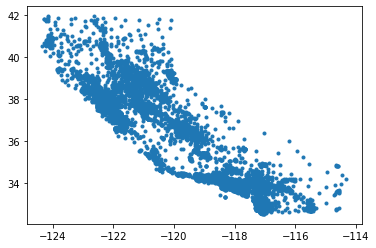

In [3]:
plt.scatter(df_X.Longitude, df_X.Latitude, marker=".")
plt.show()

In [ ]:
model = cluster.KMeans()
model.fit(df_X[["Longitude", "Latitude"]])
results = model.transform(df_X[["Longitude", "Latitude"]])
results[:10]

`KMeans` model ရဲ့ `transform` result က sample (row/vector/point) တခုချင်းကနေ cluster တခုချင်းစီရဲ့ အလယ်မှတ် (centroid) ကြား distance ပဲဖြစ်တယ်။ `KMeans` ရဲ့ default `n_clusters` ဟာ 8 ဖြစ်တာမို့ အပေါ်က `result` မှာ column 8 ခု ပါတာကို သတိထားပါ။

တနည်းအားဖြင့် အဲဒီ column 8 ခုထဲက အငယ်ဆုံး distance ပိုင်ရှင် cluster ထဲမှာ အဲဒီ data sample (row/vector/point) ပါတယ်။ 

**row-by-row အငယ်ဆုံး ဂဏန်းရဲ့ index ကို ရှာတာ ဘယ်လိုရှာကြသလဲ။**

In [ ]:
clusters = np.argmin(results, axis=1)
cmap = {idx: c for idx, c in enumerate(mcolors.TABLEAU_COLORS.values())}
plt.scatter(df_X["Longitude"], df_X["Latitude"], s=1, c=clusters, cmap="plasma")
plt.show()

In [ ]:
# or there's an easier way !!!
clusters = model.predict(df_X[["Longitude", "Latitude"]])
clusters[:10]

**COOL!!!**

Now, try it with different parameters. `KMeans()` ရဲ့ parameter တွေက ... 

* `n_clusters` : default 8
* `init` : default 'k-means++' or 'random' or array-like of (n_clusters, n_features) giving initial centers
* `n_init` : how many time to try clustering to get the best. များလေ ကြာလေ၊ နည်းလေ performance မကောင်းလေ
* `max_iter` : number of iterations. များလေ ကြာလေ၊ နည်းလေ performance မကောင်းလေ
* `tol` : default 1e-4 (0.0001) when to stop before `max_iter`. များလေ မြန်လေ၊ performance မကောင်းလေ
* `random_state` : for debugging

In [ ]:
# try a 3 different sets of parameters.
# draw them out and show in chatbox. 

## Other Notable Use of Clustering

တူရာစုပေးတာအပြင် `KMeans` (အပါအဝင် Clustering တွေ) ရဲ့ အသုံးဝင်မှု တချို့ကတော့ ... 

1. As a feature engineering tool 
   မတူညီတဲ့ parameter တွေကို အသုံးပြုထားပြီး ရလာတဲ့ clustering label တွေကို additional feature column တွေအနေနဲ့ regression/classification တွေမှာ အသုံးပြုနိုင်ပါတယ်။

2. As dimensionality reduction tool
   dimension အများ (မူလ column အရေအတွက် `n`) ကို dimension အနည်း (`n_clusters` ကို) ကို ပြောင်းနိုင်ပါတယ်။ စောစောတုန်းက တွေ့ထားတဲ့ `transform` ရလာဒ်ကို `feature` အနေနဲ့ အသုံးပြုတာပါ။ 

In [ ]:
# try to cluster using other columns. 
# use 3 different sets of parameters x column sets. 
# it is ok to use more than 2 columns for clustering but
# you should normalize them first.

---

# Week 8 - Assignment

**Week 8 - Assignment အတွက် မေးရန်ရှိများကို မေးရန်**

---

# Week 10 - Assignment

```python
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn import datasets as sk_ds

df_X, ds_y = sk_ds.load_digits(return_X_y=True, as_frame=True)
images = sk_ds.load_digits().images

plt.gray()
plt.matshow(images[0])
plt.show()
```

Week 10 - Assignment မေးခွန်းမှာ ... 

အထက်ပါ dataset ကို အသုံးပြုပြီး parameter 3 စုံဖြင့် classification model 3 ခု တည်ဆောက်ရန်ဖြစ်သည်။ 

> image များသည် x, y, color နှင့် 3 dimensional array (3d tensor) များဖြစ်ကြသည်။

> classification model များအတွက် sample များသည် 1 dimension သာ (1 row/1 sample/1 dimension) ဖြစ်ကြသည်။

> ထို့ကြောင့် အောက်ပါဥပမာအတိုင်း flatten ရန် လိုအပ်သည်
> ```
> 1 2 3
> 4 5 6
> 7 8 9
> ```
> ဟူသော 2 dimensional data structure ကို 
> ```
> 1 2 3 4 5 6 7 8 9
> ```
> ဟု ဖြန့်လိုက်ခြင်းကို flattern ဟုခေါ်သည်

> ယခု Assignment အတွက် data မှာ flatten လုပ်ပြီးသားဖြစ်သည်။

**Week 10 - Assignment အတွက် မေးရန်ရှိများကို မေးရန် နှင့် Assignment ပြီးအောင် တခါတည်း လုပ်ဆောင်ရန်**

---

# Week 11 and 12 Project

Week 11 and 12 Project မှာ Week 10 Assignment နှင့် အတူတူပင်ဖြစ်သည်။ ပို၍ ကြီးသော dataset ကို သုံးမည်။

In [1]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11501568/11490434 [==============================] - 2s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


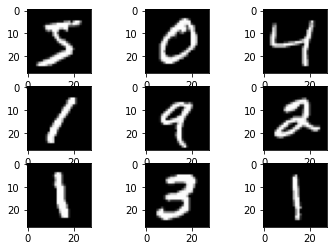

In [3]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()

## Project အိမ်စာ

1. **Project အတွက် Data (X) သည် flatten ရန် လိုပါမည်။** ထို့ကြောင့် flatten လုပ်ရန် နည်းစနစ်များကို လေ့ကျင့်ခဲ့ပါ။
   
2. **28 x 28 image သည် 784 column ရှိပါသည်။** သိပ်မကြီးလှသော်လည်း သိပ်မသေးလှသေးပါ။ သိပြီးဖြစ်သည့် recipe များနှင့် dimensionality reduction လုပ်ရန် လေ့ကျင့်ခဲ့ပါ။ 

> Hint: use test set (10k samples) ကိုသုံးပြီး code များကို ရေးပါ။ ဒါမှ စောင့်ရတာ မကြာပဲ အဖြေကို မြန်မြန် သိရမည်။
> Hint: အမြဲ function ခွဲပြီး ရေးပါ။ ဒါမှ ပြန်သုံးလို့ရမည်။

3. **ပြဿနာကြီးကို မရှင်းခင် ခပ်သေးသေးကို ရှင်းရန် ကြိုးစားကြည့်ပါ** `y = 0` နှင့် `y = 1` စသည့် subset မျှကိုသာ ယူပြီး သိပြီးဖြစ်သည့် နည်းစနစ်များနှင့် model ဆောက်ရန် ကြိုးစားပါ။